In [31]:
import os
import praw
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

In [5]:
reddit = praw.Reddit(
 client_id=os.environ.get("REDDIT_CLIENT_ID"),
 client_secret=os.environ.get("REDDIT_CLIENT_SECRET"),
 user_agent=os.environ.get("REDDIT_USER_AGENT"),
)

In [12]:
headlines = set()
for submission in reddit.subreddit("hiphopheads").hot(limit=None):
    if ("FRESH" in submission.title or "FIRST" in submission.title):
        headlines.add(submission.title)

In [13]:
hhh_df = pd.DataFrame(headlines)
hhh_df.columns = ['Titles']
hhh_df.head()

,Titles
0,"[FRESH] Seven Kayne, NLE Choppa - GAME (Video ..."
1,[FRESH] Morad - No Han Cambiado
2,[FRESH EP] Cochise - CARE PACKAGE
3,[FRESH EP] Fendi P - Pretty Tony
4,[FRESH] Lil Wayne and 2 Chainz - Long Story Short


In [14]:
hhh_df.Titles.duplicated().sum() # Duplicate count for Title
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub(r'@[A-Za-z0–9]+', '', text) #Remove @mentions replace with blank
 text = re.sub(r'#', '', text) #Remove the ‘#’ symbol, replace with blank
 text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
 text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
 text = re.sub(r':', '', text) # Remove :
 return text
#Cleaning the text
hhh_df["Titles"]= hhh_df["Titles"].apply(cleanTxt)
#Show the clean text
hhh_df.head()

,Titles
0,"[FRESH] Seven Kayne, NLE Choppa - GAME (Video ..."
1,[FRESH] Morad - No Han Cambiado
2,[FRESH EP] Cochise - CARE PACKAGE
3,[FRESH EP] Fendi P - Pretty Tony
4,[FRESH] Lil Wayne and 2 Chainz - Long Story Short


In [15]:
#Next we have to remove emoji & Unicode from the Tweet data.
def remove_emoji(string):
 emoji_pattern = re.compile("["
 u"\U0001F600-\U0001F64F" # emoticons
 u"\U0001F300-\U0001F5FF" # symbols & pictographs
 u"\U0001F680-\U0001F6FF" # transport & map symbols
 u"\U0001F1E0-\U0001F1FF" # flags (iOS)
 u"\U00002500-\U00002BEF" # chinese char
 u"\U00002702-\U000027B0"
 u"\U00002702-\U000027B0"
 u"\U000024C2-\U0001F251"
 u"\U0001f926-\U0001f937"
 u"\U00010000-\U0010ffff"
 u"\u2640-\u2642"
 u"\u2600-\u2B55"
 u"\u200d"
 u"\u23cf"
 u"\u23e9"
 u"\u231a"
 u"\ufe0f" # dingbats
 u"\u3030"
 "]+", flags=re.UNICODE)
 return emoji_pattern.sub(r'', string)
#Cleaning the text
hhh_df["Titles"]= hhh_df["Titles"].apply(remove_emoji)
#Show the clean text
hhh_df.head()

,Titles
0,"[FRESH] Seven Kayne, NLE Choppa - GAME (Video ..."
1,[FRESH] Morad - No Han Cambiado
2,[FRESH EP] Cochise - CARE PACKAGE
3,[FRESH EP] Fendi P - Pretty Tony
4,[FRESH] Lil Wayne and 2 Chainz - Long Story Short


In [16]:
#import sys
#sys.path.append('../Community-Sentiment-Album/venv/Lib/site-packages/')
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [17]:
#Create a function to get the subjectivity
def getSubjectivity(text):
 return TextBlob(text).sentiment.subjectivity
#Create a function to get Polarity
def getPolarity(text):
 return TextBlob(text).sentiment.polarity
#Now we create a new column for what we just did and add it to the Tweet_df dataframe
hhh_df['Subjectivity'] = hhh_df['Titles'].apply(getSubjectivity)
hhh_df['Polarity'] = hhh_df['Titles'].apply(getPolarity)
#Now display data
hhh_df.head()

,Titles,Subjectivity,Polarity
0,"[FRESH] Seven Kayne, NLE Choppa - GAME (Video ...",0.45,-0.050000
1,[FRESH] Morad - No Han Cambiado,0.50,0.300000
2,[FRESH EP] Cochise - CARE PACKAGE,0.50,0.300000
3,[FRESH EP] Fendi P - Pretty Tony,0.75,0.275000
4,[FRESH] Lil Wayne and 2 Chainz - Long Story Short,0.40,0.083333


In [18]:
#Group the range of Polarity into different categories
def getInsight(score):
 if score < 0:
     return "Negative"
 elif score == 0:
     return "Neutral"
 else:
     return "Positive"
hhh_df["Insight"] = hhh_df["Polarity"].apply(getInsight)
hhh_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"[FRESH] Seven Kayne, NLE Choppa - GAME (Video ...",0.450000,-0.050000,Negative
1,[FRESH] Morad - No Han Cambiado,0.500000,0.300000,Positive
2,[FRESH EP] Cochise - CARE PACKAGE,0.500000,0.300000,Positive
3,[FRESH EP] Fendi P - Pretty Tony,0.750000,0.275000,Positive
4,[FRESH] Lil Wayne and 2 Chainz - Long Story Short,0.400000,0.083333,Positive
5,[FRESH] Smoove Dinero - dead right (skelli + s...,0.478571,0.128571,Positive
6,[FRESH] Belly and Audio Chateau - Ghost (Hip H...,0.500000,0.300000,Positive
7,"[FRESH] TyFontaine, Summrs, Joony & TTM Dawg -...",0.500000,0.300000,Positive
8,[FRESH] The Kid LAROI - WHAT'S THE MOVE? (feat...,0.312500,0.150000,Positive
9,[FRESH] AG Club - eva,0.500000,0.300000,Positive


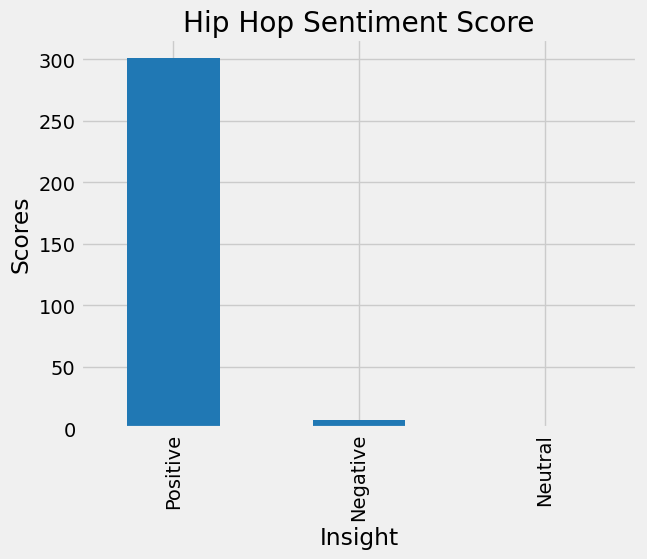

In [19]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Hip Hop Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
hhh_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

In [93]:
posts = []
names = []
for submission in reddit.subreddit("fantanoforever").search("new album"):
    posts.append(submission.title)
    names.append(findArtist(submission.title))

In [94]:
fan_df = pd.DataFrame(posts)
fan_df.columns = ['Titles']
fan_df['Artist'] = names
fan_df.head()

,Titles,Artist
0,"Jack Harlow announced a new album for Friday, ...",Jack Harlow announced a
1,Thoughts on Aesop Rock's new album?,Thoughts on Aesop Rock's
2,Thoughts on the new Skrillex album?,Skrillex
3,On swans new album post.,On swans
4,Thoughts on Kesha’s new album?,Thoughts on Kesha’s


In [95]:
fan_df['Subjectivity'] = fan_df['Titles'].apply(getSubjectivity)
fan_df['Polarity'] = fan_df['Titles'].apply(getPolarity)
#Now display data
fan_df["Insight"] = fan_df["Polarity"].apply(getInsight)
fan_df.head(50)

,Titles,Artist,Subjectivity,Polarity,Insight
0,"Jack Harlow announced a new album for Friday, ...",Jack Harlow announced a,0.454545,0.136364,Positive
1,Thoughts on Aesop Rock's new album?,Thoughts on Aesop Rock's,0.454545,0.136364,Positive
2,Thoughts on the new Skrillex album?,Skrillex,0.454545,0.136364,Positive
3,On swans new album post.,On swans,0.454545,0.136364,Positive
4,Thoughts on Kesha’s new album?,Thoughts on Kesha’s,0.454545,0.136364,Positive
5,Sufjan Stevens' new album dropped today! Predi...,Sufjan Stevens',0.454545,0.170455,Positive
6,The new fall out boys album suck. here are som...,fall out boys,0.477273,0.318182,Positive
7,"New travis album, thoughts?",travis,0.454545,0.136364,Positive
8,Fantano looking at the new Mac Demarco album,Mac Demarco,0.454545,0.136364,Positive
9,What's your opinion on The Rolling Stones? (Ne...,What's your opinion on The Rolling Stones? (,0.454545,0.213068,Positive


In [96]:
#Extract Artist name from title to determine whose album is having sentiment analysis run.
def findArtist(title):
    titlesList = []
    title = str(title)
    artist = title
    reg1 = re.search("New\s(.+?)\salbum", title, flags=re.IGNORECASE)
    if reg1:
        artist = reg1.group(1)
    reg2 = re.search("(.+?)new\salbum", title, flags=re.IGNORECASE)
    if (reg2):
        artist = reg2.group(1)
    return artist

In [97]:
#fan_df['Titles'] = str(fan_df['Titles']).apply(findArtist)
fan_df['Titles'] = findArtist(fan_df['Titles'])
#fan_df.head(50)
#print(type(fan_df['Titles']))
#fan_df.rename(columns="bonk")